### Name : Rishi Jain
### Email : rj1016743@gmail.com , rishijainai262003@gmail.com
### Codalab Username : Rishi_jain

#### Importing Necessary Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.metrics import Accuracy, F1Score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [4]:
df = pd.read_csv('Tweets_data.csv')

In [5]:
df.head()

,Id,Tweet,Emotion,Score
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [6]:
df['Emotion'].unique()

array(['anger', 'fear', 'joy', 'sadness'], dtype=object)

In [7]:
labels_dict = {'sadness':0 ,'joy':1, 'anger':2, 'fear':3}
df['label'] = df['Emotion'].map(labels_dict)

#### Data Visualization

<Axes: xlabel='count', ylabel='Emotion'>

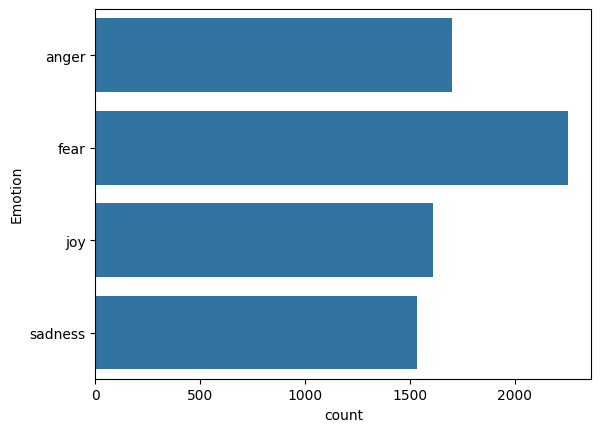

In [32]:
sns.countplot(df['Emotion'])

In [8]:
df.head()

,Id,Tweet,Emotion,Score,label
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938,2
1,10001,So my Indian Uber driver just called someone t...,anger,0.896,2
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896,2
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896,2
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896,2


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7097 entries, 0 to 7096
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       7097 non-null   int64  
 1   Tweet    7097 non-null   object 
 2   Emotion  7097 non-null   object 
 3   Score    7097 non-null   float64
 4   label    7097 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 277.4+ KB


In [10]:
df.duplicated().sum()

0

#### Data Cleaning and preprocessing

In [11]:
import re
def NLP_cleaning(text):
    text_corpus = []
    for sent in text:
        sent = re.sub('<[^>]*>', '', sent)
        sent = re.sub('[^a-zA-z0-9]', ' ', sent)
        sent = sent.lower()
        text_corpus.append(sent)

    return text_corpus

In [12]:
text = df['Tweet'].to_list()
text = NLP_cleaning(text)

In [13]:
text[:5]

['how the fu k  who the heck  moved my fridge     should i knock the landlord door   angry  mad   ',
 'so my indian uber driver just called someone the n word  if i wasn t in a moving vehicle i d have jumped out  disgusted',
 ' dpd_uk i asked for my parcel to be delivered to a pick up store not my address  fuming  poorcustomerservice',
 'so ef whichever butt wipe pulled the fire alarm in davis bc i was sound asleep  pissed  angry  upset  tired  sad  tired  hangry       ',
 'don t join  btcare they put the phone down on you  talk over you and are rude  taking money out of my acc willynilly   fuming']

In [14]:
X_train , X_test , Y_train , Y_test = train_test_split(text , df['label'] , train_size = 0.8 , random_state = 100 , stratify = df['label'])
Y_train = Y_train.values
Y_test = Y_test.values

In [15]:
from sentence_transformers import SentenceTransformer

model1 = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')
train_embeddings = model1.encode(X_train)
test_embeddings = model1.encode(X_test)

c:\Users\DELL\PYTHON\lib\site-packages\torch\_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


#### Models

In [16]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [17]:
svm_classifier = SVC( C=100)
svm_classifier.fit(train_embeddings, Y_train)
y_pred = svm_classifier.predict(test_embeddings)
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7732394366197183


In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
Model_RFC = RandomForestClassifier(n_estimators=200, random_state=500)
Model_RFC.fit(train_embeddings , Y_train)
Y_pred = Model_RFC.predict(test_embeddings)
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6788732394366197


In [20]:
from xgboost import XGBClassifier
Model_xgb = XGBClassifier()
Model_xgb.fit(train_embeddings , Y_train)
Y_pred = Model_xgb.predict(test_embeddings)
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7133802816901409


#### Classification Report

In [21]:
y_pred = svm_classifier.predict(test_embeddings)
print("Classification report using SVM:\n", classification_report(Y_test, y_pred))

y_pred = Model_RFC.predict(test_embeddings)
print("Classification report using Random Forest Classifier:\n", classification_report(Y_test, y_pred))

y_pred = Model_xgb.predict(test_embeddings)
print("Classification report using XGB Classifier:\n", classification_report(Y_test, y_pred))

Classification report using SVM:
               precision    recall  f1-score   support

           0       0.70      0.68      0.69       307
           1       0.85      0.81      0.83       322
           2       0.74      0.79      0.77       340
           3       0.79      0.79      0.79       451

    accuracy                           0.77      1420
   macro avg       0.77      0.77      0.77      1420
weighted avg       0.77      0.77      0.77      1420

Classification report using Random Forest Classifier:
               precision    recall  f1-score   support

           0       0.70      0.40      0.51       307
           1       0.76      0.71      0.74       322
           2       0.72      0.68      0.70       340
           3       0.61      0.84      0.71       451

    accuracy                           0.68      1420
   macro avg       0.70      0.66      0.66      1420
weighted avg       0.69      0.68      0.67      1420

Classification report using XGB Classifie

#### Results

##### Here SVM was working better in comparison with other 2 models

##### Here 'sadness':0 ,'joy':1, 'anger':2, 'fear':3

In [28]:
st1 = ["I am very happy today"]
s1_emb = model1.encode(st1)
svm_classifier.predict(s1_emb)

array([1], dtype=int64)

In [29]:
st2 = ["I am very angry today"]
s2_emb = model1.encode(st2)
svm_classifier.predict(s2_emb)

array([2], dtype=int64)

In [30]:
st = ["I am not feeling good today"]
st_emb = model1.encode(st)
svm_classifier.predict(st_emb)

array([3], dtype=int64)

In [31]:
st = ["I don't like the way that guy talked with me"]
st_emb = model1.encode(st)
svm_classifier.predict(st_emb)

array([3], dtype=int64)